Initial setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%run "Common setup.ipynb"

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
RC = mk.RecordCollection("{}/rest_filtered_corpora.txt".format(TMP_DIR))

<hr> Convert manually sorted papers to dataframe

In [4]:
software_packages = pd.read_csv('{}/uasa_software_phrases_sorted_2019-03-01.csv'.format(DATA_DIR))

In [5]:
software_packages

,relevant,DOI,title,1,2,3,4,5
0,?,10.1117/1.JRS.7.073591,Determination of the overlap factor and its en...,The problem of overlap factor (OVF) computatio...,A sensitivity analysis is carried out as a fun...,Insertion of a field lens proves to be an eleg...,Parametric simulations are carried out to show...,The ray-tracing approach presented here is str...
1,No (not related to environment),10.1615/Int.J.UncertaintyQuantification.201601...,SOFTWARE RELIABILITY GROWTH MODEL WITH TEMPORA...,Increasingly software systems are developed to...,Based on a stochastic model of the software fa...,"To validate our model, we consider five partic...",Experimental comparisons with existing methods...,"Based on the stochastic model, the analytical ..."
2,?,10.2166/wqrjc.2011.028,A simulation of the fate of nitrogen in an on-...,"Following a sensitivity analysis, the model wa...",Modeling was performed with the GPS-X (TM) sof...,The calibrated model shows a good agreement wi...,Modeling of residential wastewater treatment a...,Obtained results show that the studied pilot u...
3,?,10.1002/2017WR020814,"A Practical, Robust Methodology for Acquiring ...",These predictions often contain a significant ...,Regional groundwater flow models play an impor...,One way to reduce this uncertainty is to colle...,The so-called Null-Space Monte Carlo method is...,The method incorporates any existing informati...
4,No (not related to environment),10.1002/cnm.2615,Verification of computational models of cardia...,"The field of 'verification, validation and unc...","The first stage, verification, is the evaluati...",These problems are carefully constructed so th...,For computational models of cardiac activity t...,We define D-D model problems with exact soluti...
5,No,10.1016/j.watres.2009.03.017,Nitritation performance and biofilm developmen...,Mathematical simulations of these two geometri...,The modeling simulations demonstrated that Ki ...,The experimental results showed that the count...,mg L-) and high pH (.-.,Sensitivity analysis results showed that the o...
6,?,10.1214/14-BA909,Sensitivity Analysis for Bayesian Hierarchical...,We propose a novel formal approach to prior se...,Other formal approaches to prior sensitivity a...,"Despite its importance, informal approaches to...",It quantifies sensitivity without the need for...,Prior sensitivity examination plays an importa...
7,Yes - NEVA,10.1007/s10584-014-1254-5,Non-stationary extreme value analysis in a cha...,The software presents the results of non-stati...,NEVA includes posterior probability intervals ...,This framework is implemented in the Non-stati...,We evaluate both stationary and non-stationary...,This paper introduces a framework for estimati...
8,Yes,10.1061/(ASCE)CP.1943-5487.0000239,Study of MEPDG Sensitivity Using Nonparametric...,Using four-layer pavement geometry [two asphal...,Because the new Mechanistic-Empirical Pavement...,"Instead, nonparametric regression procedures c...",Thirty inputs are used to randomly generate i...,"In addition to these, alligator cracking is hi..."
9,Yes - GUI-HDMR,10.1016/j.envsoft.2008.12.002,GUI-HDMR - A software tool for global sensitiv...,The developed GUI-HDMR software copes very wel...,GUI-HDMR can be applied to a wide range of app...,The high dimensional model representation (HDM...,The HDMR software described here combines the ...,The performance of the GUI-HDMR software has b...


In [6]:
software_rc = wosis.find_pubs_by_doi(RC, software_packages.DOI)

<hr>Analysing the software data
<br> - Keyword trend
<br> - Publication trend

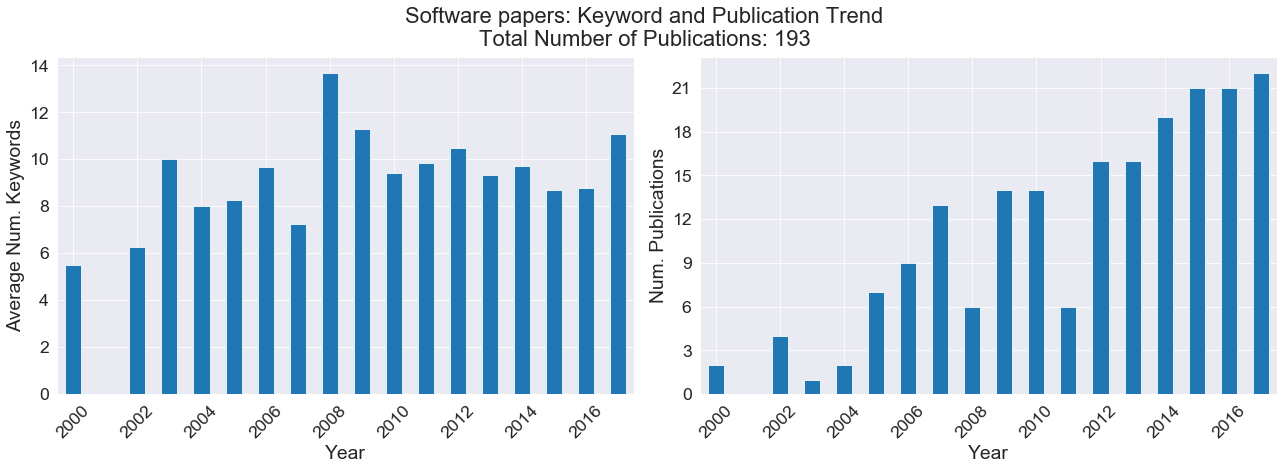

In [7]:
wos_plot.plot_kw_trend(software_rc, title='Software papers: Keyword and Publication Trend')

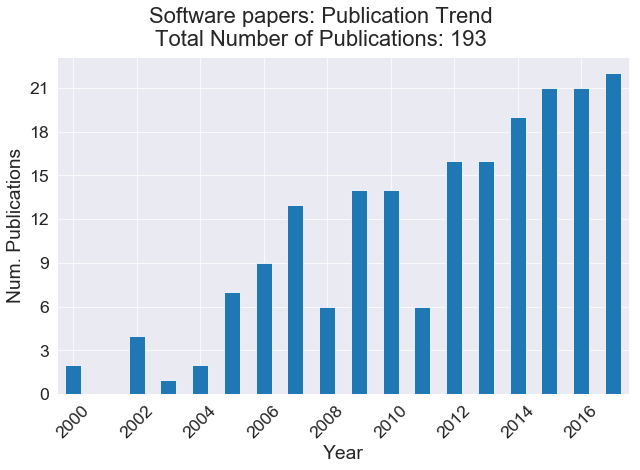

In [8]:
wos_plot.plot_pub_trend(software_rc, title='Software papers: Publication Trend')

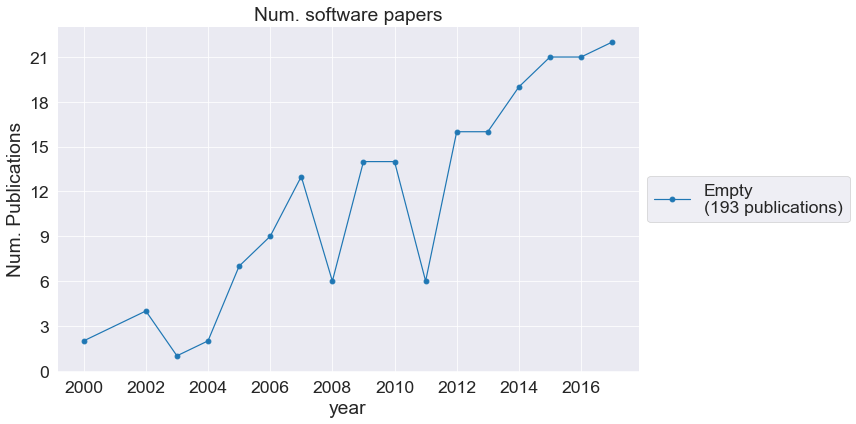

In [9]:
wos_plot.plot_topic_trend([software_rc], total_rc=False, title='Num. software papers')

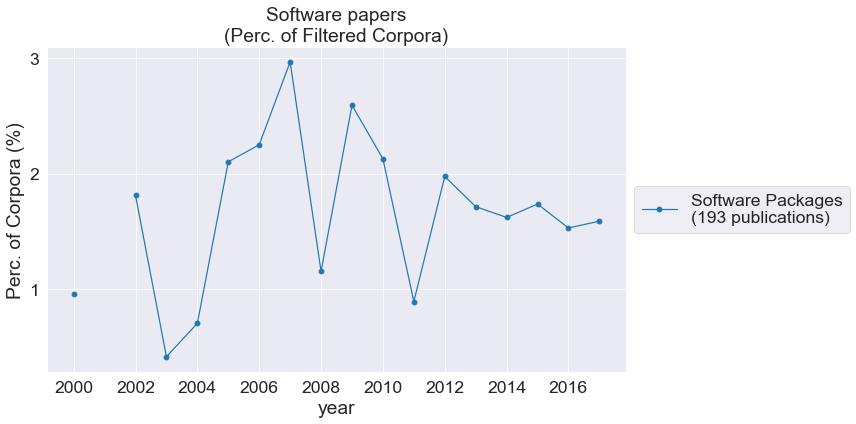

In [10]:
software_rc.name = 'Software Packages'
wos_plot.plot_topic_trend([software_rc], total_rc=RC, title='Software papers\n(Perc. of Filtered Corpora)', 
                          save_plot_fn='{}/Figure_12'.format(FIG_DIR))

<hr> 
   - Identifying UA/SA/optimization in the corpora <br>
   - Ploting keyword, publication, and topic trend

In [11]:
UQ = wosis.keyword_matches(software_rc, ['uncertainty analysis', 'ua', 'uncertainty quantification'], threshold=95.0)

In [12]:
all_uq = UQ.combine_recs()

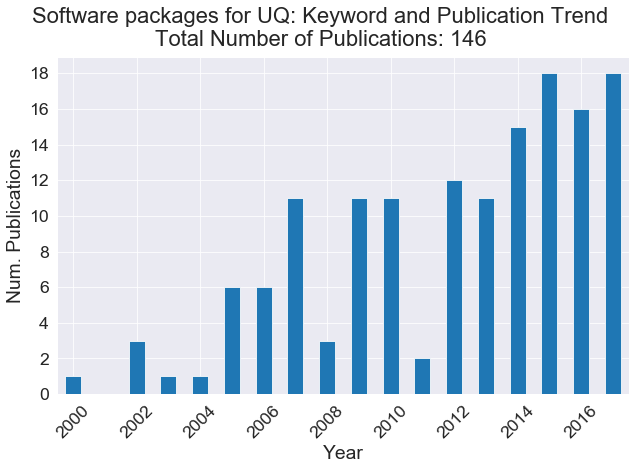

In [13]:
wos_plot.plot_pub_trend(all_uq, title='Software packages for UQ: Keyword and Publication Trend', 
                       save_plot_fn='{}/Figure_14_c.png'.format(FIG_DIR))

In [14]:
SA = wosis.keyword_matches(software_rc, ['sensitivity analysis', 'sa'], threshold=95.0)

In [15]:
all_sa = SA.combine_recs()

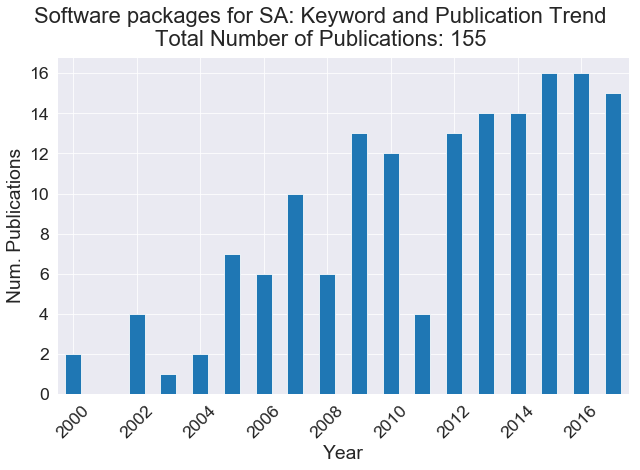

In [16]:
wos_plot.plot_pub_trend(all_sa, title='Software packages for SA: Keyword and Publication Trend', 
                       save_plot_fn='{}/Figure_14_b.png'.format(FIG_DIR))

In [17]:
optimization = wosis.keyword_matches(software_rc, ['optimization'], threshold=95.0)

In [18]:
all_optimization = optimization.combine_recs()

In [19]:
all_opt_df = wosis.rc_to_df(all_optimization)
all_opt_df.loc[all_opt_df['year'] == 2007, 'title'].tolist()

['Methods and object-oriented software for FE reliability and sensitivity analysis with application to a bridge structure',
 'Parameter estimation and uncertainty analysis for a watershed model']

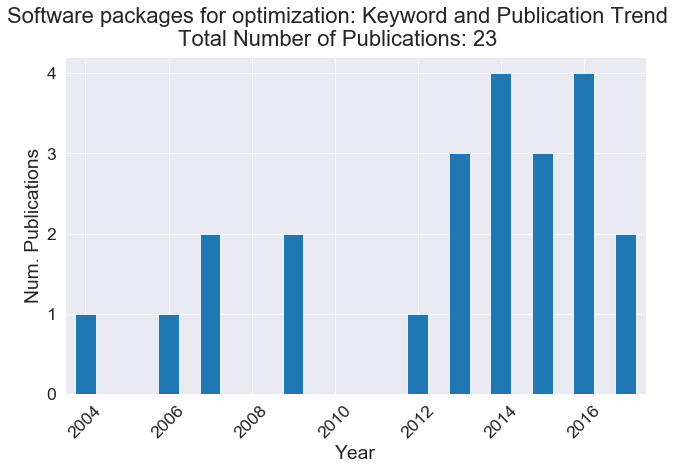

In [20]:
wos_plot.plot_pub_trend(all_optimization, title='Software packages for optimization: Keyword and Publication Trend', \
                       save_plot_fn='{}/Figure_14_a.png'.format(FIG_DIR))

In [21]:
all_uq.name = 'UQ'
all_sa.name = 'SA'
all_optimization.name = 'Optimization'

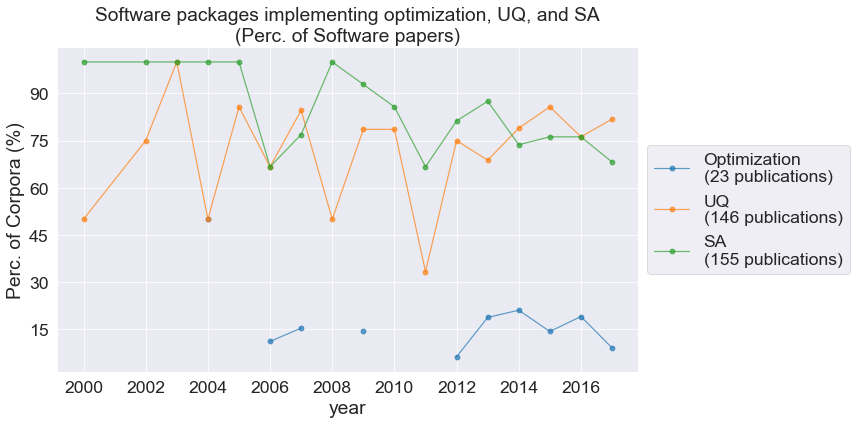

In [22]:
wos_plot.plot_topic_trend([all_optimization, all_uq, all_sa], total_rc=software_rc, 
                          title='Software packages implementing optimization, UQ, and SA\n(Perc. of Software papers)', 
                          save_plot_fn='{}/Figure_13_b.png'.format(FIG_DIR))

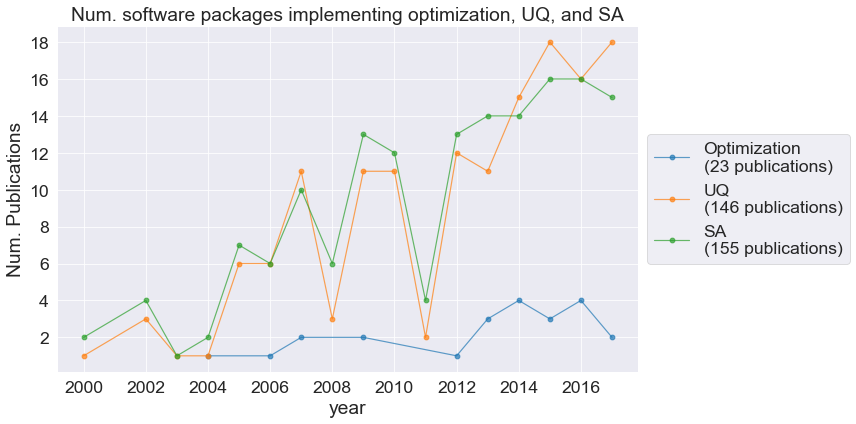

In [23]:
wos_plot.plot_topic_trend([all_optimization, all_uq, all_sa], 
                          title='Num. software packages implementing optimization, UQ, and SA', 
                          save_plot_fn='{}/Figure_13_a.png'.format(FIG_DIR))

<hr>
Plotting applications and software corpora on common axes to identify trends.

In [24]:
applications = pd.read_csv('{}/all_applications.csv'.format(DATA_DIR))

Error occured getting: WOS:000414896200007 does it exist in the RecordCollection?
Error occured getting: WOS:000229668900012 does it exist in the RecordCollection?


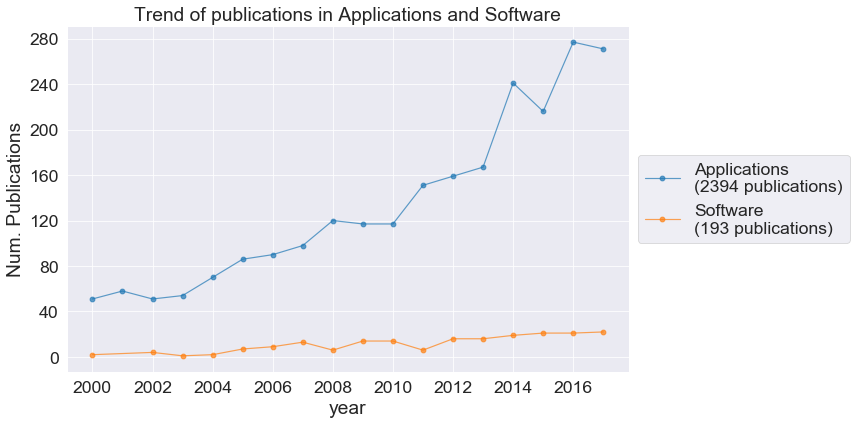

In [25]:
applications_rc = wosis.extract_recs(applications.id[:], RC)
applications_rc.name = 'Applications'
software_rc.name = 'Software'
wos_plot.plot_topic_trend([applications_rc, software_rc],
                          title='Trend of publications in Applications and Software')

<hr> Running a key-phrase extraction on UA/SA/optimization to identify the fields using this software.

In [26]:
uq_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_uq))

In [27]:
uq_phrases.display_phrases()

Multi-scale equation of state computations for confined fluids (2017) 
https://dx.doi.org/10.1016/j.compchemeng.2017.05.028 

() is used to determine internal energies of departure for mixtures, U-M(D), in confined spaces and compared to U-M(D) from direct NVT Monte Carlo simulation. 

The sensitivity of the mixture energy parameter, a(M), for the Gibbs-Helmholtz constrained (GHC) equation, confined fluid molar volume, V-M, and bubble point pressure are studied as a function of uncertainty in U-M(D). 

Canonical (NVT) Monte Carlo simulations are used to determine internal energies of departure of pure fluids using the RASPA software system (Dubbeldam et al., ). 


Optimization of biofiltration for odor control: Model development and parameter sensitivity (2002) 
https://dx.doi.org/10.2175/106143002X139703 

The model simulations showed that the existence of a water layer surrounding the biofilm in a biofiltration unit lowers the removal efficiency of hydrogen sulfide. 

A dynamic model

The likelihood function adopted in MICA assumes that the residuals between the measured and modelled values have a normal distribution. 

This study compares the results from three different scenarios: (i) when normality of the residuals was checked but if they were not normal then nothing was done (unverified); (ii) normality assumption was checked, verified (using data transformations) and a weighting strategy was used that gives more importance to high flows; and (iii) normality assumption was checked and verified, but no weights were applied. 


Sensitivity testing of a model for exploring water resources utilisation and management options (2005) 
https://dx.doi.org/10.1016/j.envsoft.2004.09.011 

The toolbox was developed for application in the highland regions of northern Thailand. 

There is potential for the model to be further simplified although more extensive model testing is required to ensure that such simplifications would not adversely impact on the utility of the toolbo

The outcomes of computational analyses using the experimental data prove the feasibility of the Bayesian-based methods for model calibration, validation, and selection. 

In the present study, a general dynamic data-driven application system (DDDAS) is developed for real-time monitoring of damage in composite materials using methods and models that account for uncertainty in experimental data, model parameters, and in the selection of the model itself. 


A standard interface between simulation programs and systems analysis software (2006) 
https://dx.doi.org/10.2166/wst.2006.029 

This interface is designed to facilitate linkage of environmental simulation programs with systems analytical software and thus can contribute to remedying the deficiency in applying systems analytical techniques to environmental modelling studies. 

It is open for implementation by academic and commercial simulation and systems analytical software developers and is very simple to implement. 

Furthermore, s


Chloride migration in groundwater for a tannery belt in Southern India (2012) 
https://dx.doi.org/10.1007/s10661-011-2156-x 

Results indicated that hydraulic conductivity played a more sensitive role than did dispersivity. 

It was found that even if the pollutant load reduced to % of the present level, the Cl- concentration in groundwater, even after  years, would not be reduced to the permissible limit of drinking water in the tannery belt. 

software to investigate the chloride migration in an area of . 

Total dissolved solids and chloride (Cl-) measurements in open wells in the tannery cluster vary from , to , and , to , mg/l, respectively. 

Input to the chloride migration model was a groundwater flow model that considered steady and transient conditions. 


Sensitivity analysis for volcanic source modeling quality assessment and model selection (2012) 
https://dx.doi.org/10.1016/j.cageo.2012.03.008 

The increasing knowledge and understanding of volcanic sources has led to the

Nonlinear calibration-constrained optimization can also provide good estimates of parameter and predictive uncertainty, even in situations where the objective function surface is complex. 


Estimation of evapotranspiration from ground-based meteorological data and global land data assimilation system (GLDAS) (2015) 
https://dx.doi.org/10.1007/s00477-014-1004-2 

Comparison of the ETref gathered from observation and GLDAS revealed that both of them showed similar seasonal variation, although ETref calculated from GLDAS were underestimated. 

Results showed that the Penman (Proc R Soc Lond Ser A Math Phys Sci :-, ) FAO- Penman-Monteith,  Kpen equation (combination equations), the  Makkink, Priestley-Taylor equation (radiation based equation), and the  Hargreaves equation had a good overall rank. 

Using the six selected equations, seasonal analysis was conducted and evaluated using the bias and RMSE. 

In this study,  different equations provided in the Reference Evapotranspiration Calc

Sensitivity analysis performed provides important insights into the model structure providing guidance for model improvement. 


A 2-D process-based model for suspended sediment dynamics: a first step towards ecological modeling (2015) 
https://dx.doi.org/10.5194/hess-19-2837-2015 

A robust sediment transport model is a first step in developing a chain of models enabling simulations of contaminants, phytoplankton and habitat conditions. 

The model may act as the base model for a chain of ecological models assessing the impact of climate change and management scenarios. 

This works aims to determine turbidity levels in the complex-geometry delta of the San Francisco estuary using a process-based approach (DelftD Flexible Mesh software). 

Model results show that our process-based approach is a valuable tool in assessing sediment dynamics and their related ecological parameters over a range of spatial and temporal scales. 

Our approach includes a detailed calibration against measured

These problems are carefully constructed so that they can be easily run using a general solver and can be used to greatly increase confidence that an implementation is correct, which we illustrate by testing one major solver, 'Chaste', on the problems. 

For computational models of cardiac activity to be used in safety-critical clinical decision-making, thorough and rigorous testing of the accuracy of predictions is required. 

We define D-D model problems with exact solutions for each of the monodomain, bidomain, and bidomain-with-perfusing-bath formulations of cardiac electro-physiology, which allow for the first time the testing of cardiac solvers against exact errors on fully coupled problems in all dimensions. 

The field of 'verification, validation and uncertainty quantification' has been developed to evaluate the credibility of computational predictions. 


Estimating uncertainty on internal dose assessments (2007) 
https://dx.doi.org/10.1093/rpd/ncm361 

() Estimating the erro

AC rutting is highly affected by AADTT, percentage of trucks in design direction, and tire pressure. 


Predicting the Long-Term Performance of a Structural Best Management Practice with the BMP ToolBox Model (2010) 
https://dx.doi.org/10.1089/ees.2009.0105 

The study applied the BMP ToolBox model to a BMP site in Taiwan to test its validity. 

Furthermore, the one-factor-at-a-time method (OFAT) was applied in a sensitivity analysis to identify sensitive model parameters. 

It is costly to constantly sample to monitor the performance of a structural best management practice (BMP). 

The BMP ToolBox model was calibrated and verified using two years of sample data. 

The BMP Toolbox model was successfully applied, and a process for evaluating the long-term operation of structural BMP sites was established. 


Stability analysis of rotary power flow controller (2015) 
https://dx.doi.org/10.1002/jnm.2025 

In this paper, a linear model is developed for RPFC in the dq-reference frame. 

Th

We used the ratio of exposure to toxicity (REXTOX) model proposed by the OECD, which had been successfully validated in the study area as part of a previous study and which was extended to calculate pesticide concentrations in adjacent streams. 

A sensitivity analysis indicated that the most significant model parameters were the width of the no-application zone and the degree of plant interception. 

The prediction of runoff-related pesticide entry into surface waters on a landscape level usually requires considerable efforts with regard to input data, time, and personnel. 


Adaptive stochastic Galerkin FEM (2014) 
https://dx.doi.org/10.1016/j.cma.2013.11.015 

Details on the implementation with the open-source software framework ALEA are presented; it is generic, and is based on available stiffness and mass matrices of a FEM for the deterministic, nonparametric nominal problem evaluated in the FEniCS environment. 

The reliability of the residual estimator is established. 

Asynchro

Model uncertainty needs to be quantified to provide objective assessments of the reliability of model predictions and of the risk associated with management decisions that rely on these predictions. 

The posterior forecast samples are obtained from model runs that use the corresponding posterior parameter samples. 


Effect of bacteria density and accumulated inert solids on the effluent pollutant concentrations predicted by the constructed wetlands model BIO_PORE (2015) 
https://dx.doi.org/10.1016/j.ecoleng.2014.09.069 

Results of the sensitivity analysis showed that the value of M-cap has a dramatic effect on the simulated effluent concentrations of COD and ammonia nitrogen, which clearly decreased for increasing values of this parameter. 

The aim of the current work was to determine the effect of these two parameters on the effluent pollutant concentrations predicted by the model. 

Results of the mesh optimization procedure indicated that among the  tested meshes of different el

An axially dispersed plug flow model with non-linear isotherm based on the linear driving force (LDF) approximation was used to predict the fixed-bed breakthrough curves for HS adsorption from biogas on sewage sludge thermally treated. 


Discrete element representation of manure products (2006) 
https://dx.doi.org/10.1016/j.compag.2005.10.004 

A procedure was also developed to create clusters of particles randomly oriented and located within the modeled domain. 

A sensitivity analysis was performed to study the influence of parameters defining the linear and Hertz-Mindlin contact constitutive models. 

The results showed that numerous parameters have an influence on the behaviour of the virtual product in the direct shear test. 

The cluster-generation code was tested for clusters made of up to six particles, but could be expanded to include more particles. 

The results generated by this procedure in terms of granulometry of the assembly of particles were very close to the user spe

A major challenge in next-generation industrial applications is to improve numerical analysis by quantifying uncertainties in predictions. 

We revisit experimental benchmarks often used for validation of deterministic water wave models. 


Infiltration under snow cover: Modeling approaches and predictive uncertainty (2017) 
https://dx.doi.org/10.1016/j.jhydrol.2016.12.042 

Further, our study demonstrated that an uncertainty analysis of model predictions is easily accomplished due to the low computational demand of the models and efficient calibration software and is absolutely worth the additional investment. 

Therefore, we established a snowmelt model calibration dataset that is both temporally dense and represents the integrated snowmelt infiltration signal for the Vers Chez le Brandt research catchment, which functions as a rather unique natural lysimeter. 

Lastly, development of a systematic instrumentation that evaluates the distributed, temporal evolution of snowpack drainage

https://dx.doi.org/10.1109/TSMCC.2007.893279 

Models are compared numerically, statistically, and in the presence of additive noise. 

The final goal is to build useful, robust, and ultimately understandable models for individualizing the dosage of CyA. 

Patients followed a standard triple therapy, and CyA trough concentration was the dependent variable. 

We conclude that the PD-SVM approach produces more accurate and robust models than do neural networks. 

This paper proposes a twofold approach for therapeutic drug monitoring (TDM) of kidney recipients using support vector machines (SVMs), for both predicting and detecting Cyclosporine A (CyA) blood concentrations. 


Risk and uncertainty analysis of gas pipeline failure and gas combustion consequence (2014) 
https://dx.doi.org/10.1007/s00477-013-0845-4 

The performed probabilistic analysis enables to investigate uncertainty and failure rates of pipelines when age-dependence is significant and when it is not relevant. 

The relat

https://dx.doi.org/10.1016/j.cageo.2005.10.007 

The SIMLAB software was used, both to generate the input sample and to calculate the sensitivity indices. 

Analysis of the sensitivity of predictions of slope instability to input data and model uncertainties provides a rationale for targeted site investigation and iterative refinement of geotechnical models. 

Variance-based sensitivity analysis (VBSA) provides a global, model-independent sensitivity measure. 


Stormwater pollutant loads modelling: epistemological aspects and case studies on the influence of field data sets on calibration and verification (2007) 
https://dx.doi.org/10.2166/wst.2007.090 

It is hard to find, if not impossible, an "optimum" or "best" unique set of parameters values. 

Model calibration and verification appear to dramatically depend on the data sets used for their calibration and verification. 

This paper presents some epistemological problems and difficulties with practical consequences in the applicat

We implemented the BQP in the context of the Zonation method, but it could as well be implemented into any other spatially explicit reserve-planning framework. 

Therefore, many reserve-design methods use qualitative heuristics, such as distance-based criteria or boundary-length penalties to induce reserve aggregation. 

We devised a quantitative method that introduces aggregation into reserve networks. 

The BQP can be estimated for any habitat model that includes neighborhood (connectivity) effects, and it can be introduced into reserve selection software in a standardized manner We used the BQP in a reserve-design case study of the Hunter Valley of southeastern Australia. 


A Practical, Robust Methodology for Acquiring New Observation Data Using Computationally Expensive Groundwater Models (2017) 
https://dx.doi.org/10.1002/2017WR020814 

This study proposes a new methodology for collecting data in an optimal fashion so that the information acquired is maximized. 

These prediction

The user can analyse different inhalation cases showing either that dose per unit intake cannot be applied if the aerosol contains a low number of particles or that an inhibition of the late pulmonary clearance by particle transport can occur which contributes to a - fold increase in effective dose as compared with application of default parameters. 


On ISSM and leveraging the Cloud towards faster quantification of the uncertainty in ice-sheet mass balance projections (2016) 
https://dx.doi.org/10.1016/j.cageo.2016.08.007 

We show how errors in the projections were accurately quantified using Monte-Carlo sampling analysis on the EC Cloud, and how a judicious mix of high-end parallel computing and Cloud use can best leverage existing infrastructures, and significantly accelerate delivery of potentially ground-breaking climate projections, and in particular, enable uncertainty quantification that were previously impossible to achieve. 

We demonstrate how this approach was used to car

In [28]:
sa_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_sa))

In [29]:
sa_phrases.display_phrases()

Optimization of biofiltration for odor control: Model development and parameter sensitivity (2002) 
https://dx.doi.org/10.2175/106143002X139703 

The model simulations showed that the existence of a water layer surrounding the biofilm in a biofiltration unit lowers the removal efficiency of hydrogen sulfide. 

A dynamic model that describes the mass transport and attenuation of odor-causing air emissions (i.e., hydrogen sulfide and other reduced sulfur compounds) in a biofiltration unit was developed and incorporated into a software package called Biofilter(TM). 

Model equations were converted to ordinary differential equations using orthogonal collocation and the resulting ordinary differential equations were solved using the DGEAR algorithm. 

internal diffusion and biofilm. 

Mechanisms included advective flow, mass transfer from the bulk phase to the biofilm, biofilm internal diffusion, and biological reaction in the biofilm. 


Second law and sensitivity analysis of large ME-TVC 

An ASM-based model was implemented in the numerical software MATHEMATICA where sensitivity analyses and simulations of a membrane bioreactor (MBR) system were carried out. 

Similar results were in general obtained in both cases and according to these analyses, the most significant inputs over the model predictions were growth and storage heterotrophic biomass yields and decay coefficient. 


Sensitivity testing of a model for exploring water resources utilisation and management options (2005) 
https://dx.doi.org/10.1016/j.envsoft.2004.09.011 

The toolbox was developed for application in the highland regions of northern Thailand. 

There is potential for the model to be further simplified although more extensive model testing is required to ensure that such simplifications would not adversely impact on the utility of the toolbox. 

The hydrologic component showed strong non-linearity to the infiltration parameters of the CATCHCROP model, although this did not greatly impact estimates 

The accuracy of the optimised parameters was assessed against experimental data from a second lab-scale reactor treating EC effluent with an additional carbon source (molasses). 

It was concluded that the model predicted reasonably the dynamic behaviour of the anaerobic reactor under different loading rates. 


Parameter sensitivity analysis and optimization of Noah land surface model with field measurements from Huaihe River Basin, China (2015) 
https://dx.doi.org/10.1007/s00477-015-1033-5 

This study aims to identify the parameters that are most important in controlling the Noah land surface model (LSM), the analysis of parameter interactions, and the evaluation of the performance of parameter optimization using the parameter estimation software PEST. 

To our knowledge, this parameter interaction in the Noah LSM has never been studied before. 

According to the sensitivity analysis results, four sensitive parameters were chosen to be optimized using the PEST method. 

Three sensit

Based on the reduced mechanism and engine parameters, a D model of the engine was constructed with the Forte code. 

The findings showed that the addition of syngas could reduce the ignition delay time and increase the laminar flame speed. 

Based on the theory of direct relation graph (DRG) and the sensitivity analysis, a reduced mechanism for the diesel-syngas dual fuel was constructed. 


Effect of fracture zone on DNAPL transport and dispersion: a numerical approach (2010) 
https://dx.doi.org/10.1007/s12665-010-0468-8 

DNAPL movement in the subsurface showed a high sensitivity to fracture dip variation. 

Two numerical simulation techniques have been used to identify a suitable method to assist in the characterization of DNAPL movement within fractured porous rock aquifers. 

Both MODFLOW and UTCHEM software modeling suites were used to simulate different scenarios in fracture dip and hydraulic conductivities. 

Sensitivity analysis was conducted on both the hydraulic conductivity

Finally, the results showed that the related fuzzified data supported the FE model and provided an insight for extended offshore pile designs. 

The resultant data of the sensitivity analysis suggested that the orientation degree is the main factor in the pile's geometrical behavior because piles which had the optimal operational degree of about A degrees are more sustained. 

The resulting data were implemented to create Fuzzy Inference System (FIS) classifications. 

In this study, ANSYS was used as the FE modeling software to study the geometrical and geotechnical properties of the offshore piles and their effects on supporting jacket platforms. 

Among numerous offshore structures used in oil extraction, jacket platforms are still the most favorable ones in shallow waters. 


UNCERTAINTY IN THE DEVELOPMENT AND USE OF EQUATION OF STATE MODELS (2013) 
https://dx.doi.org/10.1615/Int.J.UncertaintyQuantification.2012003960 

In addition to feedback on the prototypes, several themes and 

Three of the main parameters taken into account were the kinetic rate constant, amount of dye adsorbed at equilibrium and the Langmuir isotherm constant. 


Fidelity of Network Simulation and Emulation: A Case Study of TCP-Targeted Denial of Service Attacks (2008) 
https://dx.doi.org/10.1145/1456645.1456649 

In this article, we investigate the differences between simulation and emulation when conducting denial of service (DoS) attack experiments. 

We find dramatic differences between simulation and emulation results for DoS experiments. 

As a case study, we consider low-rate TCP-targeted DoS attacks. 

We design constructs and tools for emulation testbeds to achieve a level of control comparable to simulation tools. 


Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Biogeochemical Model Using Inverse Modelling (2013) 
https://dx.doi.org/10.1007/s11270-013-1677-z 

The aim of this study is to establish and demonstrate a procedure for calibration of DayC

The design specifies a processing capacity of , dry U.S. tons (, dry metric tonnes) of woody biomass per day and incorporates  research targets from NREL and other sources for technologies that will facilitate the future commercial production of cost-competitive ethanol. 

This techno-economic study investigates the production of ethanol and a higher alcohols coproduct by conversion of lignocelluosic biomass to syngas via indirect gasification followed by gas-to-liquids synthesis over a precommercial heterogeneous catalyst. 

gallons of ethanol and . 

The design yields . 

The design and analysis is based on research at NREL, other national laboratories, and The Dow Chemical Company, and it incorporates commercial technologies, process modeling using Aspen Plus software, equipment cost estimation, and discounted cash flow analysis. 


Determination of the overlap factor and its enhancement for medium-size tropospheric lidar systems: a ray-tracing approach (2013) 
https://dx.doi.org/10

Application of the Morris algorithm for sensitivity analysis of the REALM model for the Goulburn irrigation system (2006) 
https://dx.doi.org/10.1007/s10666-005-9029-z 

The REALM modelling shell is widely used in Australia as a water allocation modelling tool. 

The Goulburn is more sensitive to some of the numerical convergence parameters used in the allocation software, while the Broken is less sensitive to these factors. 

REALM represents the river and irrigation system as a network of storages and carriers. 

The model has been optimised to best represent the water harvesting and allocation for use by water management authorities. 

The numerical convergence factors also lead to important second-order effects. 


Comparative study on simulation performances of CORSIM and VISSIM for urban street network (2013) 
https://dx.doi.org/10.1016/j.simpat.2013.05.007 

However, little information is available to the users in applying these models to the most appropriate situations, or even

Additionally, in order to reduce the number of experiments and determine the dependency of our model against Cloud resource and workflow parameters, the conducted comprehensive sensitivity analysis shows that the correctness of our model is independent of workflow parallel section size. 

However, the ideal simulated environment produces the same output for the same workflow schedule and input parameters and thus can not reproduce the Cloud variant behavior. 

We determine the minimum amount of data that needs to be collected or minimum number of test cases that needs to be repeated for each experiment in order to get less than % inaccuracy for our noising parameter. 


Traffic Parameters Estimation to Predict Road Side Pollutant Concentrations using Neural Networks (2009) 
https://dx.doi.org/10.1007/s10666-007-9129-z 

In this area, various loop detectors and one pollution-monitoring site were located. 

Finally, after a sensitivity analysis, it was showed that queues length were the 

With respect to model parameterization and sensitivity analysis, this work uses a practical example to suggest that methods that start with simple models and use computationally frugal model analysis methods remain valuable in any toolbox of model development methods. 

The model was used to evaluate management scenarios and showed that similar dewatering results could be achieved using  % less pumped water, but would require installing newly positioned wells and cooperation between mine owners. 

Validation tests using three other recharge and pumpage conditions suggest good accuracy for the predictions considered. 

The approach to model development used in this work employs repeated analysis using sensitivity and inverse methods, including use of a new observation-stacked parameter importance graph. 


NHPP software reliability model considering the uncertainty of operating environments with imperfect debugging and testing coverage (2017) 
https://dx.doi.org/10.1016/j.apm.2017.06.03

Using the proposed models, we quantitatively show how to estimate the number of defects by varying the defect detection ratio, defect correction ratio, the percentage of added code, and the percentage of deleted code. 

The defect detection ratio is identified to have the greatest contribution to the variance of the estimated number of remaining defects based on the sensitivity analysis using Monte-Carlo simulation. 

The mathematical relationship between the number of defects detected during a testing phase and the total estimated remaining defects at the end of the same testing phase for both models are elaborated in detail. 

Two types of discrete defect removal models that consider the dynamics of code churn behavior during software testing phases under distributed software development environment are proposed. 


Bayesian inference of earthquake parameters from buoy data using a polynomial chaos-based surrogate (2017) 
https://dx.doi.org/10.1007/s10596-017-9646-z 

Finally, the co

mg L-) and high pH (.-. 

Sensitivity analysis results showed that the oxygen mass transfer coefficient (K-i) and maximum specific growth rate of ammonia-oxidizing (AOB) and nitrite-oxidizing bacteria (NOB) were the determinant parameters in nitrogen conversion simulations. 


Development of the integrated fuzzy analytical hierarchy process with multidimensional scaling in selection of natural wastewater treatment alternatives (2015) 
https://dx.doi.org/10.1016/j.ecoleng.2014.11.006 

Sensitivity analysis was conducted and reflects the importance of weighing on alternative selection. 

Multi-criteria decision-making in selection of wastewater treatment alternatives has been explored widely, while few past studies comprehensively addressed the integration of various aspects (e.g., environmental, economical, ecological and management, and technical factors), which is a priority for decision-makers. 

This is followed by the MDS method to determine the optimal alternative directly through

This paper proposes a twofold approach for therapeutic drug monitoring (TDM) of kidney recipients using support vector machines (SVMs), for both predicting and detecting Cyclosporine A (CyA) blood concentrations. 


Risk and uncertainty analysis of gas pipeline failure and gas combustion consequence (2014) 
https://dx.doi.org/10.1007/s00477-013-0845-4 

The performed probabilistic analysis enables to investigate uncertainty and failure rates of pipelines when age-dependence is significant and when it is not relevant. 

The related work includes performance of the following tasks: to study gas pipeline combustion model, to identify uncertainty of model inputs noting their variation range, and to apply uncertainty and sensitivity analysis for results of this model. 

The rupture of a high-pressure natural gas pipeline can lead to consequences that can pose a significant threat to people and property in the close vicinity to the pipeline fault location. 

For this purpose, authors present

Variance-based sensitivity analysis (VBSA) provides a global, model-independent sensitivity measure. 


Stormwater pollutant loads modelling: epistemological aspects and case studies on the influence of field data sets on calibration and verification (2007) 
https://dx.doi.org/10.2166/wst.2007.090 

It is hard to find, if not impossible, an "optimum" or "best" unique set of parameters values. 

Model calibration and verification appear to dramatically depend on the data sets used for their calibration and verification. 

This paper presents some epistemological problems and difficulties with practical consequences in the application of stormwater quality models, such as simplified representation of reality, scaling-up, over-parameterisation, transition from calibration to verification and prediction, etc. 

Most of them were initially developed for research purposes, and have been later on implemented in commercial software packages devoted to operational needs. 

In urban drainage, st

Obtained results show that the studied pilot unit is able to eliminate most of the ammonia contained in the influent, except for days with exceptionally high influent concentrations. 

The pilot consisted in a septic tank followed by a fixed-film, partly aerated bioreactor with effluent recirculation operated under two different scenarios: normal operating conditions and increased influent flow. 

Following a sensitivity analysis, the model was calibrated by comparing results from the pilot experiment and those of the simulation predictions. 


Fuzzy logic approach and sensitivity analysis for agent-based crowd injury modeling (2014) 
https://dx.doi.org/10.1177/0037549713518598 

In some countries, these kinds of activities are the only way to express public displeasure with their government. 

A group of police and military officers were consulted for a set of injury model rules, and those rules were then included in the simulation platform. 

Sensitivity analysis has been conducted t

The Toolkit for Ecosystem Service Site-based Assessment (TESSA) was used to compare ecosystem services between two alternative states of the site (protection or lack of protection with consequent changed land use) to estimate the net consequences of protection. 

We estimated that lack of protection would have substantially reduced the annual ecosystem service flow, including a % reduction in the value of greenhouse gas sequestration, % reduction in carbon storage, % reduction in nature-based recreation, and % reduction in water quality. 


Chaospy: An open source tool for designing methods of uncertainty quantification (2015) 
https://dx.doi.org/10.1016/j.jocs.2015.08.008 

(C)  The Authors. 

The paper compares Chaospy to similar packages and demonstrates a stronger focus on defining reusable software building blocks that can easily be assembled to construct new, tailored algorithms for uncertainty quantification. 


A Novel Closed-Form Solution for Circular Openings in Generalized H

of lines in distributed program, including test data, etc. 

of bytes in distributed program, including test data, etc. 

Collocation methods include Monte Carlo, Latin Hypercube and Smolyak sparse grids and surrogate models can be obtained in terms of radial basis functions and via generalized polynomial chaos. 




In [30]:
opt_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_optimization))

In [31]:
opt_phrases.display_phrases()

Analyzing the effects of geological and parameter uncertainty on prediction of groundwater head and travel time (2013) 
https://dx.doi.org/10.5194/hess-17-3245-2013 

Uncertainty of groundwater model predictions has in the past mostly been related to uncertainty in the hydraulic parameters, whereas uncertainty in the geological structure has not been considered to the same extent. 

In the second scenario the same  geological models were subjected to model optimization, where the hydraulic parameters for each of them were estimated by calibration against observations of hydraulic head and stream discharge. 

In the third scenario each geological model was run with  randomized sets of parameters. 

The analysis documented that the uncertainty on the conceptual geological model was as significant as the uncertainty related to the embedded hydraulic parameters. 

Recent developments in theoretical methods for quantifying geological uncertainty have made it possible to consider this factor

The product is a comprehensive and freely available library of software tools for finite-element reliability and response sensitivity analysis. 

The required response sensitivities are obtained by an extensive implementation of the direct differentiation method. 

This paper addresses the growing demand for finite-element software with capabilities to incorporate uncertainty in the input parameters. 

Importance vectors are employed to rank the input parameters according to their relative influence on the structural reliability. 


Parameter sensitivity analysis and optimization of Noah land surface model with field measurements from Huaihe River Basin, China (2015) 
https://dx.doi.org/10.1007/s00477-015-1033-5 

This study aims to identify the parameters that are most important in controlling the Noah land surface model (LSM), the analysis of parameter interactions, and the evaluation of the performance of parameter optimization using the parameter estimation software PEST. 

To our 

This paper introduces a framework for estimating stationary and non-stationary return levels, return periods, and risks of climatic extremes using Bayesian inference. 

NEVA includes posterior probability intervals (uncertainty bounds) of estimated return levels through Bayesian inference, with its inherent advantages in uncertainty quantification. 

This framework is implemented in the Non-stationary Extreme Value Analysis (NEVA) software package, explicitly designed to facilitate analysis of extremes in the geosciences. 


Operational snow mapping with simplified data assimilation using the seNorge snow model (2016) 
https://dx.doi.org/10.1016/j.jhydrol.2016.03.061 

In this paper the revised seNorge snow model (v...) for snow mapping is described, and a simplified data assimilation procedure is introduced to correct detected snow model biases in near real-time. 

The model and analysis codes as well as the "R" statistical software are freely available. 

Numerical snow models are of

<hr> Top-cited journals for UA/SA/optimization
<br> - Original intention was to find top cited for each three collections, but there was significant overlap, so just ran the analysis on the entire refined_software collection

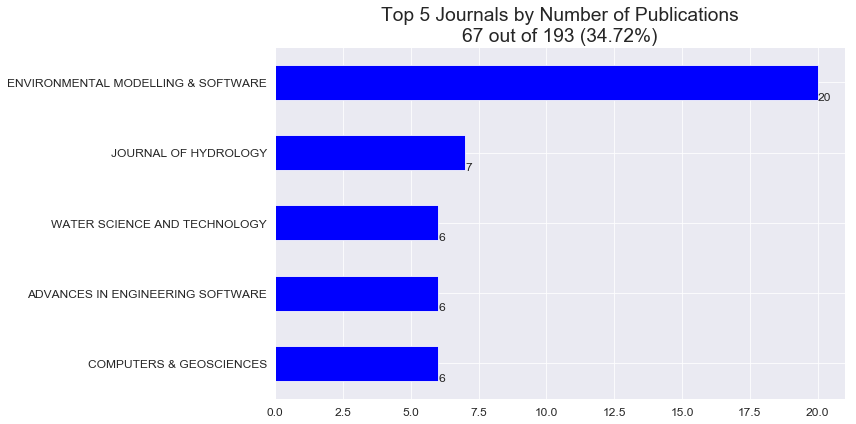

In [32]:
wos_plot.plot_pubs_per_journal(software_rc, top_n=5, annotate=True, show_stats=True)

In [33]:
journals_of_interest_software = list(map(str.upper, ['Environmental Modelling & Software', 'Journal of Hydrology', 
                                                     'Computers & Geosciences', 'Water Science and Technology', 
                                                     'Advances in Engineering Software']))

pubs_for_journals_software = wosis.find_pubs_by_journal(software_rc, journals_of_interest_software)

In [34]:
# Get citations for each paper
paper_citations_per_journal_software = {}
for journal in pubs_for_journals_software:
    fn = '{}/collection_software_{}_2019-03-08'.format(TMP_DIR, journal)
    paper_citations_per_journal_software[journal] = wosis.get_num_citations(pubs_for_journals_software[journal], 
                                                                            WOS_CONFIG,
                                                                            cache_as=fn)

Authenticated (SID: 6BT1WS72aUkiTO3mQgf)



Authenticated (SID: 7AOYPHixtN27TEUzWu6)



Authenticated (SID: 5Ew8sZ2nbL4Q6CqY8H2)



Authenticated (SID: 7DdASMpHJHPX6urLz13)



Authenticated (SID: 8EaLfKxJfspked3EjgT)


In [35]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_software = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_software.items():
    df = wosis.link_to_pub(df)
    df['journal'] = df['SO']
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)

    collection_software = collection_software.append(df[cols_of_interest][0:10], ignore_index=True)

In [36]:
top_cited_in_top_journals_software = collection_software.sort_values('citations', ascending=False)
top_cited_in_top_journals_software.head(10)

,AU,year,title,journal,citations,DOI link
0,"Gallagher, M|Doherty, J",2007,Parameter estimation and uncertainty analysis ...,ENVIRONMENTAL MODELLING & SOFTWARE,122,https://dx.doi.org/10.1016/j.envsoft.2006.06.007
1,"Ziehn, T|Tomlin, AS",2009,GUI-HDMR - A software tool for global sensitiv...,ENVIRONMENTAL MODELLING & SOFTWARE,122,https://dx.doi.org/10.1016/j.envsoft.2008.12.002
16,"Vu-Bac, N|Lahmer, T|Zhuang, X|Nguyen-Thoi, T|R...",2016,A software framework for probabilistic sensiti...,ADVANCES IN ENGINEERING SOFTWARE,106,https://dx.doi.org/10.1016/j.advengsoft.2016.0...
2,"Pianosi, F|Sarrazin, F|Wagener, T",2015,A Matlab toolbox for Global Sensitivity Analysis,ENVIRONMENTAL MODELLING & SOFTWARE,105,https://dx.doi.org/10.1016/j.envsoft.2015.04.009
28,"Dixon, B",2005,Applicability of neuro-fuzzy techniques in pre...,JOURNAL OF HYDROLOGY,100,https://dx.doi.org/10.1016/j.jhydrol.2004.11.010
3,"Landuyt, D|Broekx, S|D'hondt, R|Engelen, G|Aer...",2013,A review of Bayesian belief networks in ecosys...,ENVIRONMENTAL MODELLING & SOFTWARE,99,https://dx.doi.org/10.1016/j.envsoft.2013.03.011
4,"Wagener, T|Kollat, J",2007,Numerical and visual evaluation of hydrologica...,ENVIRONMENTAL MODELLING & SOFTWARE,87,https://dx.doi.org/10.1016/j.envsoft.2006.06.017
22,"Cannavo, F",2012,Sensitivity analysis for volcanic source model...,COMPUTERS & GEOSCIENCES,78,https://dx.doi.org/10.1016/j.cageo.2012.03.008
5,"Gan, YJ|Duan, QY|Gong, W|Tong, C|Sun, YW|Chu, ...",2014,A comprehensive evaluation of various sensitiv...,ENVIRONMENTAL MODELLING & SOFTWARE,76,https://dx.doi.org/10.1016/j.envsoft.2013.09.031
6,"Harmel, RD|Smith, DR|King, KW|Slade, RM",2009,Estimating storm discharge and water quality d...,ENVIRONMENTAL MODELLING & SOFTWARE,66,https://dx.doi.org/10.1016/j.envsoft.2008.12.006


In [37]:
top_cited_in_top_journals_software.to_csv('{}/top_cited_software_papers.csv'.format(DATA_DIR))

<hr> Searching a criteria match for areas which are applying these software packages, then using key-phrase extraction to identify whether the packages are being used for UA, SA, or optimization.

In [38]:
criteria = {
    'policy': set(['policy', 'adapt', 'decision support', 'management', 'gis']),
    'agri': set(['agricultur', 'farm']),
    'water': set(['hydrology', 'water', 'stream', 'aquifer']),
    'enviro': set(['environment', 'climate', 'ecology', 'ecosystem', 'biodivers', 'conservation']),
    'socio_economic': set(['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic']),
    'risk': set(['risk', 'risk management', 'hazard', 'control']),
    'medicine': set(['infection', 'disease', 'injury', 'medicine', 'cancer', 'treatment', 'health']),
    'chemistry': set(['chem', 'reaction', 'catalyst', 'isotope'])
}

crit_matches = wosis.keyword_matches_by_criteria(software_rc, criteria, threshold=95.0)

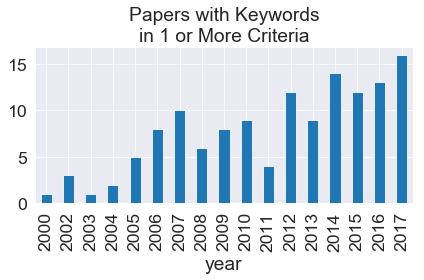

In [39]:
criteria_df = wosis.collate_keyword_criteria_matches(software_rc, crit_matches)
wos_plot.plot_criteria_trend(criteria_df, threshold=1)

In [40]:
policy = wosis.keyword_matches(software_rc, ['policy', 'adapt', 'decision support', 'management', 'gis'], threshold=95.0)

In [41]:
all_policy = policy.combine_recs()

In [42]:
policy_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_policy))

In [43]:
policy_phrases.display_phrases()

Estimation of evapotranspiration from ground-based meteorological data and global land data assimilation system (GLDAS) (2015) 
https://dx.doi.org/10.1007/s00477-014-1004-2 

Comparison of the ETref gathered from observation and GLDAS revealed that both of them showed similar seasonal variation, although ETref calculated from GLDAS were underestimated. 

Results showed that the Penman (Proc R Soc Lond Ser A Math Phys Sci :-, ) FAO- Penman-Monteith,  Kpen equation (combination equations), the  Makkink, Priestley-Taylor equation (radiation based equation), and the  Hargreaves equation had a good overall rank. 

Using the six selected equations, seasonal analysis was conducted and evaluated using the bias and RMSE. 

In this study,  different equations provided in the Reference Evapotranspiration Calculator Software (REF-ET) were utilized for estimating ETref with GLDAS and point scale data collected at  observation sites in the Korean Peninsula during . 


Uncertainty analysis for region

There is no single process that constitutes PVA, but all approaches have in common all assessment of a population's risk of extinction (or quasi extinction) or its projected population growth either under current conditions or expected from proposed management. 


Parameterization, sensitivity analysis, and inversion: an investigation using groundwater modeling of the surface-mined Tivoli-Guidonia basin (Metropolitan City of Rome, Italy) (2016) 
https://dx.doi.org/10.1007/s10040-016-1393-z 

In this work, ground-water model calibration starts with a simple parameterization that evolves into a moderately complex model. 

With respect to model parameterization and sensitivity analysis, this work uses a practical example to suggest that methods that start with simple models and use computationally frugal model analysis methods remain valuable in any toolbox of model development methods. 

The model was used to evaluate management scenarios and showed that similar dewatering results could 

A Practical, Robust Methodology for Acquiring New Observation Data Using Computationally Expensive Groundwater Models (2017) 
https://dx.doi.org/10.1002/2017WR020814 

This study proposes a new methodology for collecting data in an optimal fashion so that the information acquired is maximized. 

These predictions often contain a significant degree of uncertainty. 

And, a heuristic methodology, based on the concept of the greedy algorithm, is proposed for developing robust designs with subsets of the posterior parameter samples. 

Regional groundwater flow models play an important role in decision making regarding water resources; however, the uncertainty embedded in model parameters and model assumptions can significantly hinder the reliability of model predictions. 

One way to reduce this uncertainty is to collect new observation data from the field. 


Sensitivity testing of a model for exploring water resources utilisation and management options (2005) 
https://dx.doi.org/10.1016/

Additionally, sensitivity analysis is conducted with respect to the various system parameters. 


Numerical simulation of 3D bubbles rising in viscous liquids using a front tracking method (2008) 
https://dx.doi.org/10.1016/j.jcp.2007.12.002 

In addition, we applied this model to simulate the interaction between two bubbles rising in a liquid, which illustrated the model's capability in predicting the interaction dynamics of rising bubbles. 

The numerical model is integrated with the software package PARAMESH, a block-based adaptive mesh refinement (AMR) tool developed for parallel computing. 

Simulation results are compared with experimental observations both in aspect of terminal bubble shapes and terminal bubble velocities. 

air bubbles rising in water. 

Further, Peskin distribution function is applied to interpolate the variable values between the front and the background meshes. 


Estimates of plant density of wheat crops at emergence from very low altitude UAV imagery (2017

Therefore, we established a snowmelt model calibration dataset that is both temporally dense and represents the integrated snowmelt infiltration signal for the Vers Chez le Brandt research catchment, which functions as a rather unique natural lysimeter. 

Lastly, development of a systematic instrumentation that evaluates the distributed, temporal evolution of snowpack drainage is vital for optimal understanding and management of cold-climate hydrologic systems. 

This is extremely important because the rate and timing of snowpack drainage has substantial consequences to aquifer recharge patterns, which in turn affect groundwater availability throughout the rest of the year. 

We then evaluated the uncertainty associated with the degree-day, a modified degree-day and energy balance snowmelt model predictions using the null space Monte Carlo approach. 


Simulation modeling of soil and plant nitrogen use in a potato cropping system in the humid and cool environment (2006) 
https://dx.doi

DUET-H/WQ lists published uncertainty information for data collection procedures to assist the user in assigning appropriate data-specific uncertainty estimates and then calculates the uncertainty for individual discharge, concentration, and load values. 


Parameter estimation and uncertainty analysis for a watershed model (2007) 
https://dx.doi.org/10.1016/j.envsoft.2006.06.007 

This paper explores the use of three such methods, and compares their performance when used in conjunction with a lumped parameter model for surface water flow (HSPF) in a large watershed. 

As well as this, they can provide the modeler with valuable qualitative information on the shape of parameter and predictive probability distributions; these shapes can be quite complex, especially where local objective function optima lie within those parts of parameter space that are considered probable after calibration has been undertaken. 

Where numerical models are employed as an aid to environmental management, t

In [44]:
agri = wosis.keyword_matches(software_rc, ['agricultur', 'farm'], threshold=95.0)

In [45]:
all_agri = agri.combine_recs()

In [46]:
agri_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_agri))

In [47]:
agri_phrases.display_phrases()

Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Biogeochemical Model Using Inverse Modelling (2013) 
https://dx.doi.org/10.1007/s11270-013-1677-z 

The aim of this study is to establish and demonstrate a procedure for calibration of DayCent to improve estimation of GHG emissions. 

Crop year  data were used for model calibration and  data were used for validation. 

The DayCent model was analysed and calibrated using NO flux data collected over  years at the Iowa State University Agronomy and Agricultural Engineering Research Farms, Boone, IA. 

After parameter estimation, the model underestimated the mean daily fluxes by  %. 

Sensitivity analysis performed provides important insights into the model structure providing guidance for model improvement. 


Plant Modelling Framework: Software for building and running crop models on the APSIM platform (2014) 
https://dx.doi.org/10.1016/j.envsoft.2014.09.005 

(C)  The Authors. 

The PMF contains a top-level P

In [48]:
water = wosis.keyword_matches(software_rc, ['hydrology', 'water', 'stream', 'aquifer'], threshold=95.0)

In [49]:
all_water = water.combine_recs()

In [50]:
water_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_water))

In [51]:
water_phrases.display_phrases()

Variance-based sensitivity analysis of the probability of hydrologically induced slope instability (2006) 
https://dx.doi.org/10.1016/j.cageo.2005.10.007 

The SIMLAB software was used, both to generate the input sample and to calculate the sensitivity indices. 

Analysis of the sensitivity of predictions of slope instability to input data and model uncertainties provides a rationale for targeted site investigation and iterative refinement of geotechnical models. 

Variance-based sensitivity analysis (VBSA) provides a global, model-independent sensitivity measure. 


Investigation on the effect of geometrical and geotechnical parameters on elongated offshore piles using fuzzy inference systems (2017) 
https://dx.doi.org/10.1007/s13344-017-0044-z 

Finally, the results showed that the related fuzzified data supported the FE model and provided an insight for extended offshore pile designs. 

The resultant data of the sensitivity analysis suggested that the orientation degree is the main 

https://dx.doi.org/10.1080/02626667.2012.675064 

The demonstration is made by implementing the GUM to typical hydrometric applications and comparing the analysis results with those obtained using the Monte Carlo method. 

This paper reviews some of the most relevant efforts and subsequently demonstrates that the Guide to the expression of uncertainty in measurement (GUM) is a good candidate for estimation of uncertainty intervals for hydrometry. 

The results show that hydrological measurements would benefit from the adoption of the GUM as the working standard, because of its soundness, the availability of software for practical implementation and potential for extending the GUM to hydrological/hydraulic numerical simulations. 


Plant Modelling Framework: Software for building and running crop models on the APSIM platform (2014) 
https://dx.doi.org/10.1016/j.envsoft.2014.09.005 

(C)  The Authors. 

The PMF contains a top-level Plant class that provides an interface with the APSIM mo

We further illustrate the application of hydroPSO in two real-world case studies: we calibrate, first, a hydrological model for the Ega River Basin (Spain) and, second, a groundwater flow model for the Pampa del Tamarugal Aquifer (Chile). 


Parameterization, sensitivity analysis, and inversion: an investigation using groundwater modeling of the surface-mined Tivoli-Guidonia basin (Metropolitan City of Rome, Italy) (2016) 
https://dx.doi.org/10.1007/s10040-016-1393-z 

In this work, ground-water model calibration starts with a simple parameterization that evolves into a moderately complex model. 

With respect to model parameterization and sensitivity analysis, this work uses a practical example to suggest that methods that start with simple models and use computationally frugal model analysis methods remain valuable in any toolbox of model development methods. 

The model was used to evaluate management scenarios and showed that similar dewatering results could be achieved using  % le

The hydrodynamic groundwater software MODFLOW is used to analyse the influencing variables of the infiltration processes. 

Monte Carlo simulations and the developed one-dimensional model are used to assess the leak area and the range of pressure loss in the vicinity of the pipe leaks. 

By additional sensitivity analysis it was found that the infiltration factor and the conductivity of the backfill are very important for the calculation of the leak area. 

Besides the hydraulic conductivity of the soil and the piezometric head in the vicinity of the sewer pipe, properties of the sewer trench, the shape and the size of leaks are important influencing factors. 


Gulf war contamination assessment for optimal monitoring and remediation cost-benefit analysis, Kuwait (2016) 
https://dx.doi.org/10.1007/s12665-016-6025-3 

x () for the plume volumes and masses (dollars per volume and mass), respectively. 

Site characterization was performed on an area of  km() around the strategically vital

Uncertainties in the physical parameters of a groundwater system, due to the lack of direct access to the subsurface, strongly affect the design of water management policies, so that the risk of mismanagement becomes a critical factor in complex ecological and economic analyses. 

Stochastic modeling may help provide uncertainty quantification and also add robustness to the analysis by means of probabilistic forecasts. 

A Monte Carlo simulation, based on a coupled flow and transport groundwater D model, has been carried out to propagate the hydraulic conductivity parameter uncertainty to groundwater model outputs, namely pressure head and salt concentration. 


IPH-TRIM3D-PCLake: A three-dimensional complex dynamic model for subtropical aquatic ecosystems (2009) 
https://dx.doi.org/10.1016/j.envsoft.2009.05.006 

The software, which is freely available for research purposes, has a graphical user-friendly interface and a flexible design that allows the user to vary the complexity of th

The Toolkit for Ecosystem Service Site-based Assessment (TESSA) was used to compare ecosystem services between two alternative states of the site (protection or lack of protection with consequent changed land use) to estimate the net consequences of protection. 

We estimated that lack of protection would have substantially reduced the annual ecosystem service flow, including a % reduction in the value of greenhouse gas sequestration, % reduction in carbon storage, % reduction in nature-based recreation, and % reduction in water quality. 


Efficient uncertainty quantification of a fully nonlinear and dispersive water wave model with random inputs (2016) 
https://dx.doi.org/10.1007/s10665-016-9848-8 

Finally, we present a synthetic experiment studying the variance-based sensitivity of the wave load on an offshore structure to a number of input uncertainties. 

These methods allow us to accurately and efficiently estimate the probability distribution of the solution and require only th

Modelling nitrogen transformations in waters receiving mine effluents (2011) 
https://dx.doi.org/10.1016/j.scitotenv.2011.07.024 

It also simulates the rate of  N transformation processes occurring in the water column and sediment as well as water-sediment and water-atmosphere interactions. 

The calibrated model rendered coefficients of determination (R()) of ., . 

A six-year simulation of N(am) showed stable behaviour over time. 

for N(am), N(ox) and N(org) respectively. 

Performance measures quantitatively expressing the deviation between modelled and measured data resulted in values close to zero, indicating a stable model structure. 


Individual-based modeling of soil organic matter in NetLogo: Transparent, user-friendly, and open (2015) 
https://dx.doi.org/10.1016/j.envsoft.2015.05.007 

Here, we present a streamlined, user-friendly and open version of the individual-based model INDISIM-SOM, which describes the mineralization of soil carbon and nitrogen. 

Most of the involv

Where numerical models are employed as an aid to environmental management, the uncertainty associated with predictions made by such models must be assessed. 

Hence similar studies, or extensions of the present study, can be easily undertaken in other modeling contexts by other modelers. 

Nonlinear calibration-constrained optimization can also provide good estimates of parameter and predictive uncertainty, even in situations where the objective function surface is complex. 


Predicting the Long-Term Performance of a Structural Best Management Practice with the BMP ToolBox Model (2010) 
https://dx.doi.org/10.1089/ees.2009.0105 

The study applied the BMP ToolBox model to a BMP site in Taiwan to test its validity. 

Furthermore, the one-factor-at-a-time method (OFAT) was applied in a sensitivity analysis to identify sensitive model parameters. 

It is costly to constantly sample to monitor the performance of a structural best management practice (BMP). 

The BMP ToolBox model was calib

In [52]:
enviro = wosis.keyword_matches(software_rc, ['environment', 'climate', 'ecology', 'ecosystem', 'biodivers', 'conservation'], threshold=95.0)

In [53]:
all_enviro = enviro.combine_recs()

In [54]:
enviro_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_enviro))

In [55]:
enviro_phrases.display_phrases()

Comparison of empirical and numerical methods in tunnel stability analysis (2012) 
https://dx.doi.org/10.1080/17480930.2011.611615 

Therefore, in the absence of sufficient information for numerical analysis, the results of the empirical method can be used for this project. 

In this method the environment and the geometry can be set by the user. 

In this article, empirical methods and numerical modelling using UDEC software were used to conduct a stability analysis of the access tunnel at the Shahriar dam crest, which was one of the most important tunnels of this project. 

Empirical methods are based on the experience gathered by researchers in various parts of the world whereas numerical modelling utilises computing power and, using various modelling techniques, can be a precise way of solving very complex problems. 

This method allows the user to conduct sensitivity analysis. 


Radionuclide migration modeling through the soil-plant system as adapted for Hungarian environment (20

We simulated the pesticide entry on the landscape level at  sites in small streams situated in the central lowland of Germany with winter wheat, barley, and sugar beat as the main agricultural. 

We used the ratio of exposure to toxicity (REXTOX) model proposed by the OECD, which had been successfully validated in the study area as part of a previous study and which was extended to calculate pesticide concentrations in adjacent streams. 

A sensitivity analysis indicated that the most significant model parameters were the width of the no-application zone and the degree of plant interception. 

The prediction of runoff-related pesticide entry into surface waters on a landscape level usually requires considerable efforts with regard to input data, time, and personnel. 


Adaptive stochastic Galerkin FEM (2014) 
https://dx.doi.org/10.1016/j.cma.2013.11.015 

Details on the implementation with the open-source software framework ALEA are presented; it is generic, and is based on available s

This study evaluated the effect of temporal and spatial rainfall resolution on the predictive performance of Hydrological Simulation Program-Fortran (HSPF) using manual and automatic calibration procedures. 

Furthermore, the effect of automatic parameter estimation on the physical significance of calibrated parameter values was evaluated. 

when individual rain gauges (RG, RG, RG, and RG) were used one at a time. 

Model efficiency improved and ranged from . 


An environmental and economic analysis for geotube coastal structures retaining dredge material (2012) 
https://dx.doi.org/10.1016/j.resconrec.2012.01.011 

() on the economic aspects of geotube technology and identifies the optimum method of construction for each type of coastal structure. 

In general, the larger the scale of the project the greater the potential savings in CO emissions and cost that can be achieved through the use of geotube technology. 

The analyses highlight that the size of the structure and the distance

Our approach includes a detailed calibration against measured SSC levels, a sensitivity analysis on model parameters and the determination of a yearly sediment budget as well as an assessment of model results in terms of turbidity levels for a single year, water year (WY) . 


Groundwater fluxes in a shallow seasonal wetland pond: The effect of bathymetric uncertainty on predicted water and solute balances (2014) 
https://dx.doi.org/10.1016/j.jhydrol.2014.06.020 

We demonstrate that bathymetry can be successfully represented within the model in a simple parametric form using a cubic Sexier curve, allowing an assessment of bathymetric uncertainty due to measurement error and survey detail on the derived groundwater fluxes compared with the fixed bathymetry models. 

Water volume and solute mass balance models can be used in order to derive an estimate of groundwater fluxes within such systems. 

However, such fluxes are hard to quantify. 

We systematically quantify the uncertainty imp

A standard interface between simulation programs and systems analysis software (2006) 
https://dx.doi.org/10.2166/wst.2006.029 

This interface is designed to facilitate linkage of environmental simulation programs with systems analytical software and thus can contribute to remedying the deficiency in applying systems analytical techniques to environmental modelling studies. 

It is open for implementation by academic and commercial simulation and systems analytical software developers and is very simple to implement. 

Furthermore, such a development could stimulate the transfer of systems analytical techniques between different fields of application. 

A simple interface between simulation programs and systems analytical software is proposed. 

The proposed concept, consisting of a text file interface combined with a batch mode simulation program call, is independent of model structure, operating system and programming language. 


Parameter sensitivity analysis and optimization of N

Further, our study demonstrated that an uncertainty analysis of model predictions is easily accomplished due to the low computational demand of the models and efficient calibration software and is absolutely worth the additional investment. 

Therefore, we established a snowmelt model calibration dataset that is both temporally dense and represents the integrated snowmelt infiltration signal for the Vers Chez le Brandt research catchment, which functions as a rather unique natural lysimeter. 

Lastly, development of a systematic instrumentation that evaluates the distributed, temporal evolution of snowpack drainage is vital for optimal understanding and management of cold-climate hydrologic systems. 

This is extremely important because the rate and timing of snowpack drainage has substantial consequences to aquifer recharge patterns, which in turn affect groundwater availability throughout the rest of the year. 

We then evaluated the uncertainty associated with the degree-day, a modi

In recent years, Geographic Information Systems (GIS), neural networks and fuzzy logic techniques have been used in several hydrological studies. 

The overall objective of this research is to examine the sensitivity of neuro-fuzzy models used to predict groundwater vulnerability in a spatial context by integrating GIS and neuro-fuzzy techniques. 

Compared to bell-shaped and triangular-shaped membership functions, the neuro-fuzzy models with a trapezoidal membership function were the least sensitive to the various permutations and combinations of the learning and validation parameters. 

The sensitivity analysis showed that neuro-fuzzy models were sensitive to the shape of the fuzzy sets, number of fuzzy sets, nature of the rule weights, and validation techniques used during the learning processes. 


Modeling Nitrogen Dynamics in a Waste Stabilization Pond System Using Flexible Modeling Environment with MCMC (2017) 
https://dx.doi.org/10.3390/ijerph14070765 

This study presents an a

In [56]:
socio_ec = wosis.keyword_matches(software_rc, ['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic'], threshold=95.0)

In [57]:
all_socio_ec = socio_ec.combine_recs()

In [58]:
socio_ec_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_socio_ec))

In [59]:
socio_ec_phrases.display_phrases()

UNCERTAINTY IN THE DEVELOPMENT AND USE OF EQUATION OF STATE MODELS (2013) 
https://dx.doi.org/10.1615/Int.J.UncertaintyQuantification.2012003960 

In addition to feedback on the prototypes, several themes and issues emerged that are as compelling as the original goal and will eventually serve as a starting point for further development of visualization and analysis tools. 

In this paper we present the results from a series of focus groups on the visualization of uncertainty in equation-of-state (EOS) models. 

An effective software tool for this community must be cognizant of this workflow and alleviate the bottlenecks and barriers within it. 

The initial goal was to identify the most effective ways to present EOS uncertainty to analysts, code developers, and material modelers. 

Material model stakeholders contribute and extract information at different points in this workflow depending on their role, but encounter various institutional and technical barriers which restrict the flow

https://dx.doi.org/10.1016/j.desal.2010.02.032 

The validity of calculations as well as the identification of the most important parameters is presented. 

Sensitivity analysis is used to identify the most important parameters in the DEEP model. 

Previous continuous development was culminated in the development of the DEEP . 

Throughout the years, the software was updated constantly. 

Such updates included the user interface and model structure but not the economic models. 


Techno-Economics for Conversion of Lignocellulosic Biomass to Ethanol by Indirect Gasification and Mixed Alcohol Synthesis (2012) 
https://dx.doi.org/10.1002/ep.10625 

The design specifies a processing capacity of , dry U.S. tons (, dry metric tonnes) of woody biomass per day and incorporates  research targets from NREL and other sources for technologies that will facilitate the future commercial production of cost-competitive ethanol. 

This techno-economic study investigates the production of ethanol and a 

In [60]:
med = wosis.keyword_matches(software_rc, ['infection', 'disease', 'injury', 'medicine', 'cancer', 'treatment', 'health'], threshold=95.0)

In [61]:
all_med = med.combine_recs()

In [62]:
med_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_med))

In [63]:
med_phrases.display_phrases()

INTEGRATION OF UNCERTAINTIES INTO INTERNAL CONTAMINATION MONITORING (2010) 
https://dx.doi.org/10.1097/HP.0b013e3181cd3d47 

In this study we took into consideration the uncertainties associated with a routine monitoring program in order to evaluate the minimum intake and dose detectable for a given level of confidence. 

Potential internal contaminations of workers are monitored by periodic bioassays interpreted in terms of intake and committed effective dose through biokinetic and dosimetric models. 

These techniques are implemented in the OPSCI software under development. 

Major sources of uncertainty are the contamination time, the size distribution and absorption into blood of the incorporated particles, and the measurement errors. 

After a prospective evaluation of exposure at a workplace, a suitable monitoring program can be defined by the choice of measurement techniques and frequency of measurements. 


Effect of bacteria density and accumulated inert solids on the effluent

Results indicate the stabilization pond was the optimal alternative among five natural wastewater treatment systems. 


Predicting the Long-Term Performance of a Structural Best Management Practice with the BMP ToolBox Model (2010) 
https://dx.doi.org/10.1089/ees.2009.0105 

The study applied the BMP ToolBox model to a BMP site in Taiwan to test its validity. 

Furthermore, the one-factor-at-a-time method (OFAT) was applied in a sensitivity analysis to identify sensitive model parameters. 

It is costly to constantly sample to monitor the performance of a structural best management practice (BMP). 

The BMP ToolBox model was calibrated and verified using two years of sample data. 

The BMP Toolbox model was successfully applied, and a process for evaluating the long-term operation of structural BMP sites was established. 


Simulation, identification and statistical variation in cardiovascular analysis (SISCA) - A software framework for multi-compartment lumped modeling (2017) 
https:/

In [64]:
chem = wosis.keyword_matches(software_rc, ['chem', 'reaction', 'catalyst', 'isotope'], threshold=95.0)

In [65]:
all_chem = chem.combine_recs()

In [66]:
chem_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_chem))

In [67]:
chem_phrases.display_phrases()

Optimization of biofiltration for odor control: Model development and parameter sensitivity (2002) 
https://dx.doi.org/10.2175/106143002X139703 

The model simulations showed that the existence of a water layer surrounding the biofilm in a biofiltration unit lowers the removal efficiency of hydrogen sulfide. 

A dynamic model that describes the mass transport and attenuation of odor-causing air emissions (i.e., hydrogen sulfide and other reduced sulfur compounds) in a biofiltration unit was developed and incorporated into a software package called Biofilter(TM). 

Model equations were converted to ordinary differential equations using orthogonal collocation and the resulting ordinary differential equations were solved using the DGEAR algorithm. 

internal diffusion and biofilm. 

Mechanisms included advective flow, mass transfer from the bulk phase to the biofilm, biofilm internal diffusion, and biological reaction in the biofilm. 


Comparing sensitivity analysis methods to advance lu

Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Biogeochemical Model Using Inverse Modelling (2013) 
https://dx.doi.org/10.1007/s11270-013-1677-z 

The aim of this study is to establish and demonstrate a procedure for calibration of DayCent to improve estimation of GHG emissions. 

Crop year  data were used for model calibration and  data were used for validation. 

The DayCent model was analysed and calibrated using NO flux data collected over  years at the Iowa State University Agronomy and Agricultural Engineering Research Farms, Boone, IA. 

After parameter estimation, the model underestimated the mean daily fluxes by  %. 

Sensitivity analysis performed provides important insights into the model structure providing guidance for model improvement. 


TAMkin: A Versatile Package for Vibrational Analysis and Chemical Kinetics (2010) 
https://dx.doi.org/10.1021/ci100099g 

TAMkin is a program for the calculation and analysis of normal modes, thermochemic

The paper compares Chaospy to similar packages and demonstrates a stronger focus on defining reusable software building blocks that can easily be assembled to construct new, tailored algorithms for uncertainty quantification. 


Scalable subsurface inverse modeling of huge data sets with an application to tracer concentration breakthrough data from magnetic resonance imaging (2016) 
https://dx.doi.org/10.1002/2015WR018483 

In this paper, we extend PCGA to handle a large number of measurements (e.g.,  or more) by constructing a fast preconditioner whose computational cost scales linearly with the data size. 

Characterizing subsurface properties is crucial for reliable and cost-effective groundwater supply management and contaminant remediation. 

Only about  forward simulations in total were required to obtain the best estimate with corresponding estimation uncertainty, and the estimated K field captured key patterns of the original packing design, showing the efficiency and effective

https://dx.doi.org/10.1080/1573062X.2016.1254259 

The high variability of the results of the comparison suggests the use of the LID Editor rain barrel option for long-term simulation but not for single event analysis. 

of the EPA storm water management model (SWMM) software does not allow the consideration of demand-driven behaviour of domestic rain water harvesting (RWH) systems to evaluate their runoff retention potential. 

The low-impact development (LID) Editor rain barrel option of release . 

A sensitivity analysis revealed that the overestimation provided by the rain barrel option is significant for tanks smaller than m(), tank sizes of major diffusion for domestic RWH. 

The comparison showed the LID Editor-based model to generally overestimate the benchmark model in the evaluation of both volumetric and peak retention efficiency. 




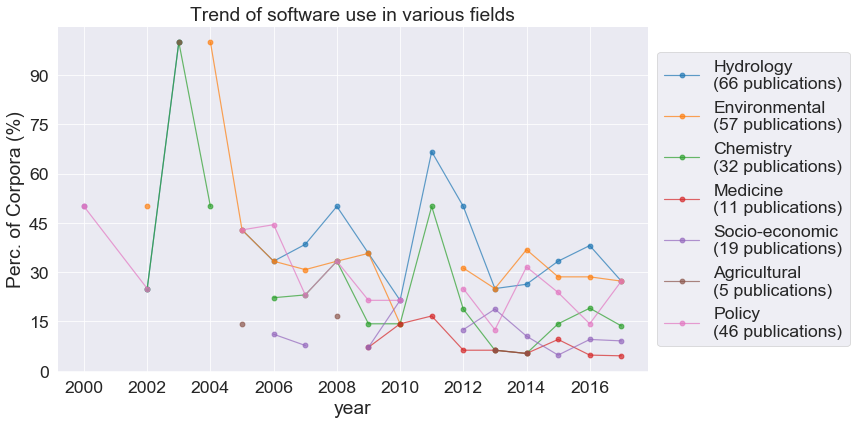

In [68]:
all_water.name = 'Hydrology'
all_enviro.name = 'Environmental'
all_chem.name = 'Chemistry'
all_med.name = 'Medicine'
all_socio_ec.name = 'Socio-economic'
all_agri.name = 'Agricultural'
all_policy.name = 'Policy'

wos_plot.plot_topic_trend([all_water, all_enviro, all_chem, all_med, all_socio_ec, all_agri, all_policy],
                          
                          total_rc=software_rc,
                          title='Trend of software use in various fields')

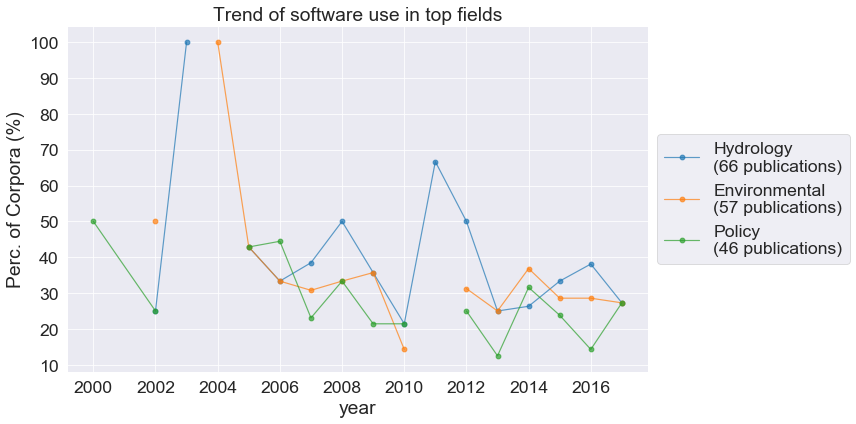

In [69]:
wos_plot.plot_topic_trend([all_water, all_enviro, all_policy],
                          title='Trend of software use in top fields',
                          total_rc=software_rc,
                          save_plot_fn='{}/Figure_10.png'.format(FIG_DIR))